In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

In [14]:
t = 0.3

k = 20
t_stim = 0.1
dt = 1e-4
w = 1e-4
a = 10000
ns, ts = util.k_spikes(t_stim, k, w, a=a, dt=dt, seed=None)
print(len(ts))

times = fsutil.create_times(t, dt)

20


In [28]:
N = 20
w_in = 0.6e-9
bias = 5e-3

f = 50 # 50
A = 0#10e-3
w_osc=.01e-9
r_b = 0.0

ns_e, ts_e, vs = neurons.lif(t, N,
                             ns, ts, 
                             (w_in, w_in/10.0), (bias, bias/10.0), 
                             f=f, A=A,
                             r_b=r_b,
                             time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


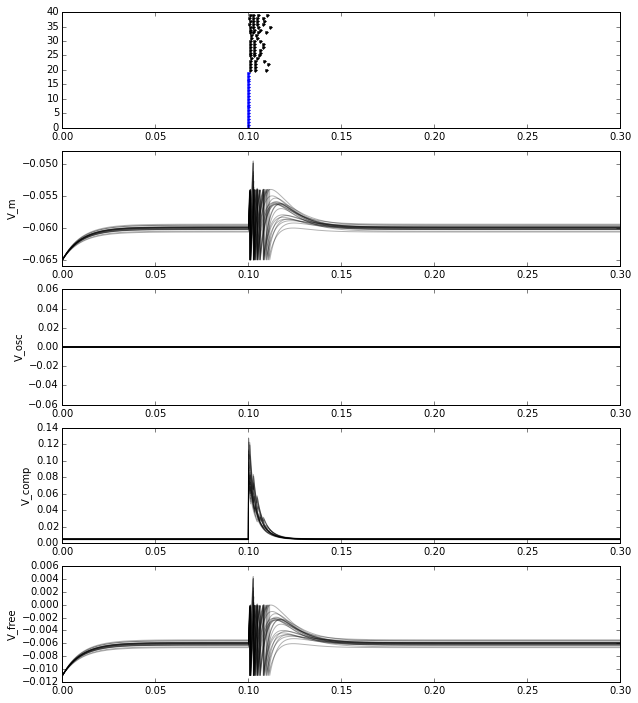

In [29]:
plt.figure(figsize=(10, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.xlim(0, .3)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.3);
plt.ylabel("V_m")

plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);
plt.ylabel("V_osc")

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
plt.ylabel("V_comp")

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3);
plt.ylabel("V_free")

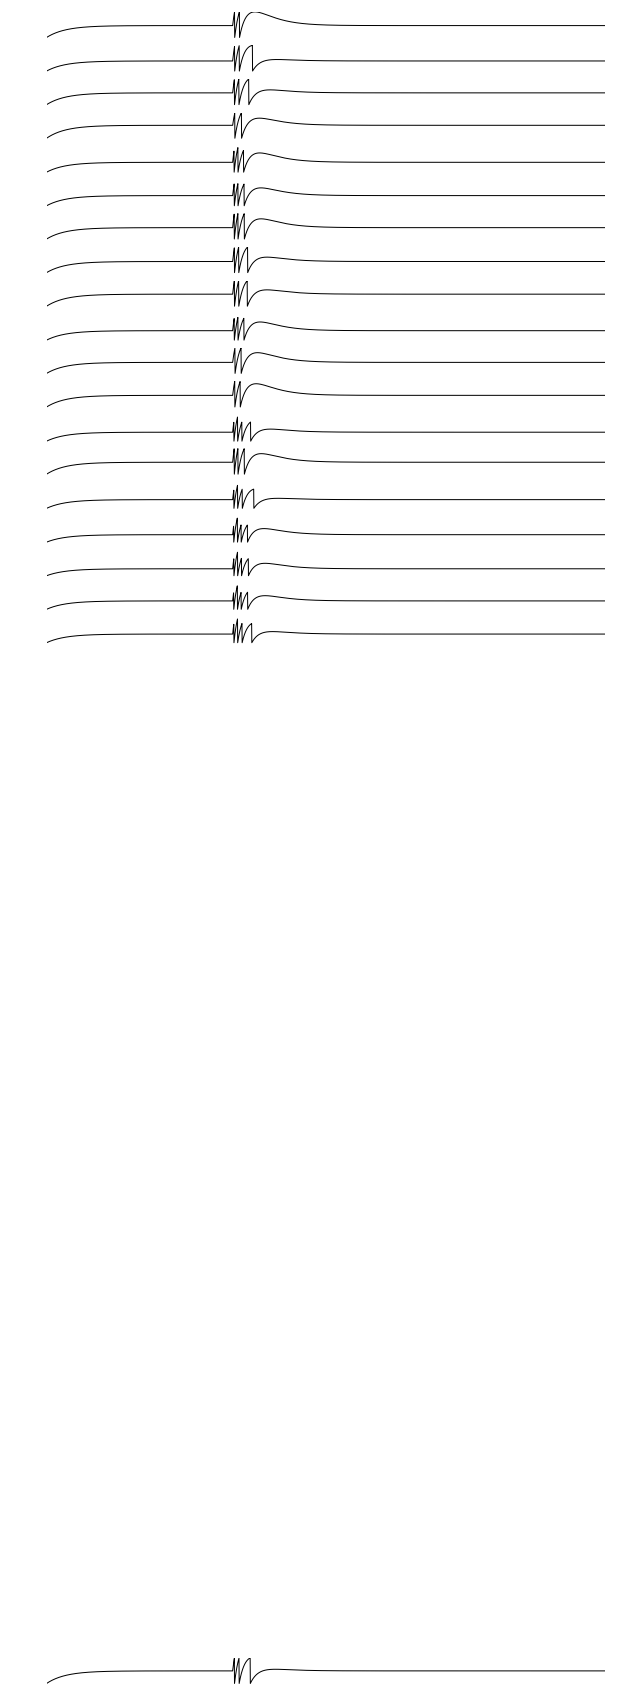

In [30]:
plt.figure(figsize=(10, 30))
for j in range(20):
    plt.subplot(50, 1, j)
    plt.plot(times, vs['vm'][j, :], 'k', alpha=1);
    plt.axis('off')

In [31]:
# Now readout the 'E' response, in another LIF 

In [12]:
N = 100
w_in = .1e-9
bias = 10e-6

f = 0
A = 0

r_b = 0.0
ns_out, ts_out, vs_out = neurons.lif(
    t, N, 
    ns_e, ts_e, 
    w_in, bias,
    f=f, A=A, 
    r_b=r_b,
    time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


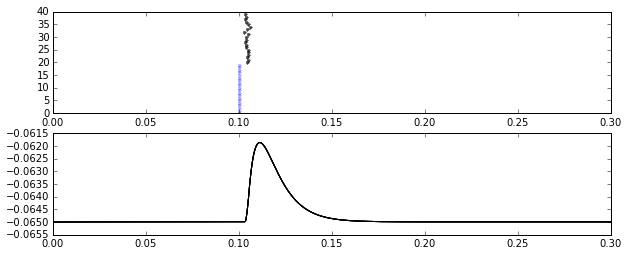

In [13]:
plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(ts, ns, '.b', alpha=0.3)
plt.plot(ts_e, ns_e + k, '.k', alpha=0.7)
plt.plot(ts_out, ns_out + k + k + 1, '.g', alpha=0.3, markersize=20)
plt.xlim(0.0, .3)

plt.subplot(212)
for j in range(20):
    plt.plot(times, vs_out['vm'][j, :], 'k', alpha=0.3);
# plt.xlim(0.09, .15)